<a href="https://colab.research.google.com/github/Ponukak/traffic_sign_classification/blob/main/IEEE_publication_traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Jun  4 21:27:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |  14543MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------



# *clone Repository for the traffic *







In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [ ]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [ ]:
!pip install keras-applications
!pip install tensorflow
!pip install keras



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# add all neccesary imports

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from keras.utils import plot_model
from IPython.display import SVG
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
import keras.backend as K
import tensorflow as tf
import random
import pickle
import pandas as pd
import cv2

In [ ]:
np.random.seed(0)

# load the traffic data here

In [ ]:
# TODO: Implement load the data here.
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
        test_data = pickle.load(f)

# spliting dataset into Train , Test And Validation

In [ ]:
# Split out features and labels
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


## **Test** **the** **data** **set** **for** **completeness**

In [ ]:
 assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
 assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
 assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
 assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
 assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
 assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

# **Read** **Traffic** **sign** **Names** **and** **class** **ID**

In [ ]:
 data = pd.read_csv('german-traffic-signs/signnames.csv')
 print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

# **Visualizing** **Dataset**

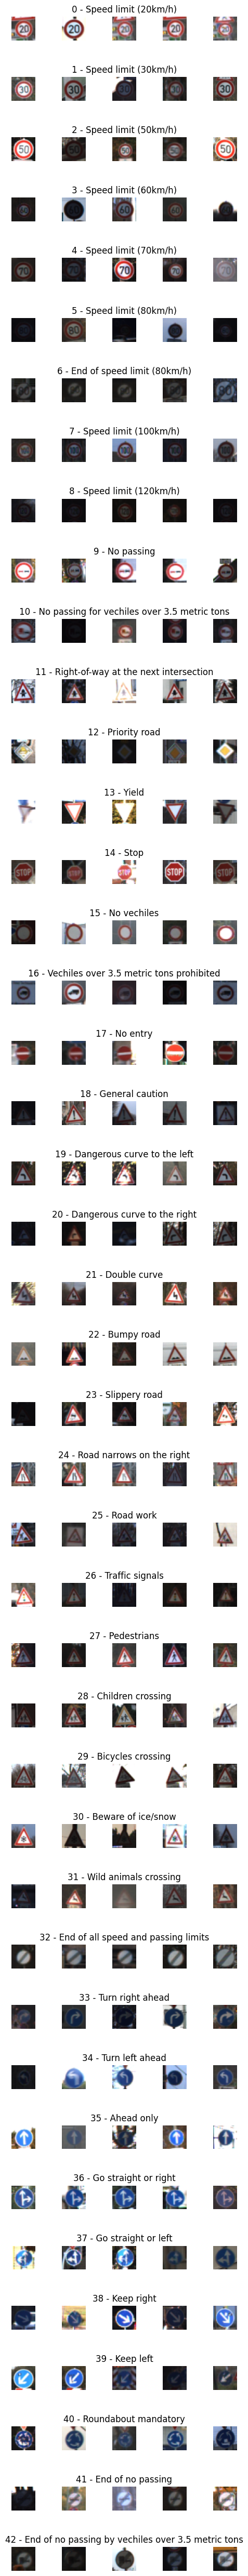

In [ ]:
num_of_samples=[]  
cols = 5
num_classes = 43  
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
     
for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_samples.append(len(x_selected))

# **Visualizing** **Distibution** **of** **Dataset**

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


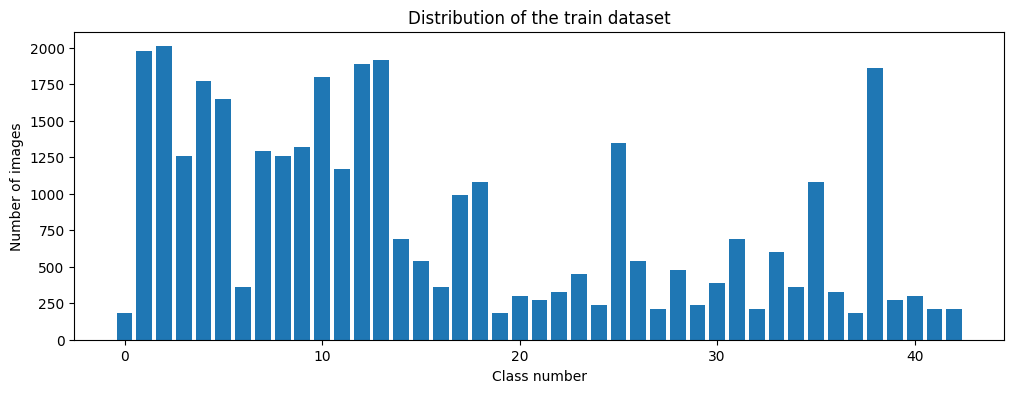

In [ ]:
    print(num_of_samples)
    plt.figure(figsize=(12, 4))
    plt.bar(range(0, num_classes), num_of_samples)
    plt.title("Distribution of the train dataset")
    plt.xlabel("Class number")
    plt.ylabel("Number of images")
    plt.show()

# **preprocessing** **Operation**

In [ ]:
def preprocess(img):
    #img =cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
    img = img/255
    return img

# **Applying** **Preprocessing** **Operation** **to** **the** **training** ,**testing** **and** **Validation** **dataset**

(34799, 32, 32, 3)


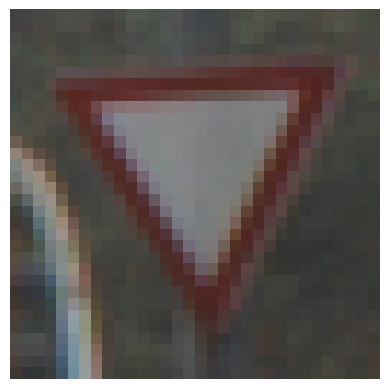

In [ ]:
X_train_rgb = np.array(list(map(preprocess, X_train)))
X_test_rgb = np.array(list(map(preprocess, X_test)))
X_val_rgb = np.array(list(map(preprocess, X_val)))
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

# **gray** **scale** **conversion** **of** **images**

In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# **histogram** **equalization** 

In [ ]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

In [ ]:
def preprocess_gray(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

(34799, 32, 32)


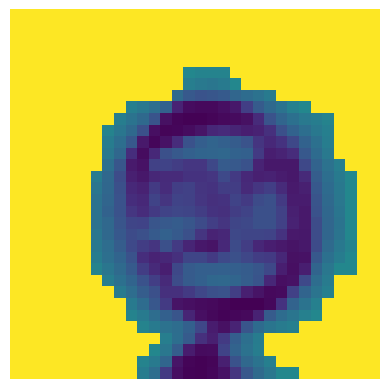

In [ ]:
X_train_gray = np.array(list(map(preprocess_gray, X_train)))
X_test_gray = np.array(list(map(preprocess_gray, X_test)))
X_val_gray = np.array(list(map(preprocess_gray, X_val)))
 
plt.imshow(X_train_gray[random.randint(0, len(X_train_gray) - 1)])
plt.axis('off')
print(X_train_gray.shape)

# **Reshaping** **data** **dimension** 

In [ ]:
X_train_gray = X_train_gray.reshape(34799, 32, 32, 1)
X_test_gray = X_test_gray.reshape(12630, 32, 32, 1)
X_val_gray = X_val_gray.reshape(4410, 32, 32, 1)

# **Gray** **Scale** **Augmentation**

In [ ]:
 from keras.preprocessing.image import ImageDataGenerator
     
 datagen_gray = ImageDataGenerator(width_shift_range=0.1,
                                height_shift_range=0.1,
                                zoom_range=0.2,
                                shear_range=0.1,
                                rotation_range=10.)
     
 datagen_gray.fit(X_train_gray)

(5, 32, 32, 1)


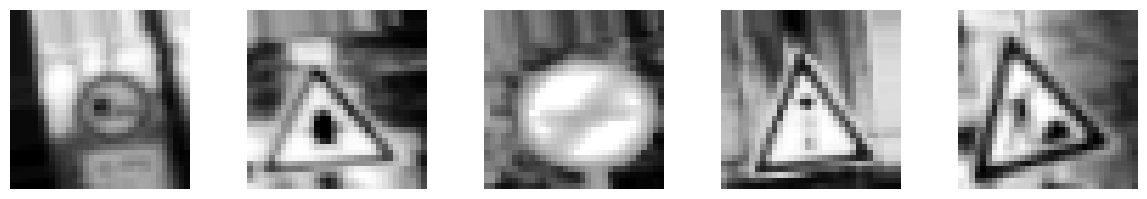

In [ ]:
batches_gray = datagen_gray.flow(X_train_gray, y_train, batch_size = 5) 
X_batch_gray, y_batch_gray = next(batches_gray)
     
fig, axs = plt.subplots(1, 5, figsize=(12, 12))
fig.tight_layout()
     
for i in range(5):
  axs[i].imshow(X_batch_gray[i].reshape((32, 32)),cmap='gray')
  axs[i].axis("off")
     
print(X_batch_gray.shape)

# **Augmentation** **for** **RGB** **images**

In [ ]:
 from keras.preprocessing.image import ImageDataGenerator
     
 datagen_rgb = ImageDataGenerator(width_shift_range=0.1,
                                height_shift_range=0.1,
                                zoom_range=0.2,
                                shear_range=0.1,
                                rotation_range=10.)  
 datagen_rgb.fit(X_train_rgb)


(5, 32, 32, 3)


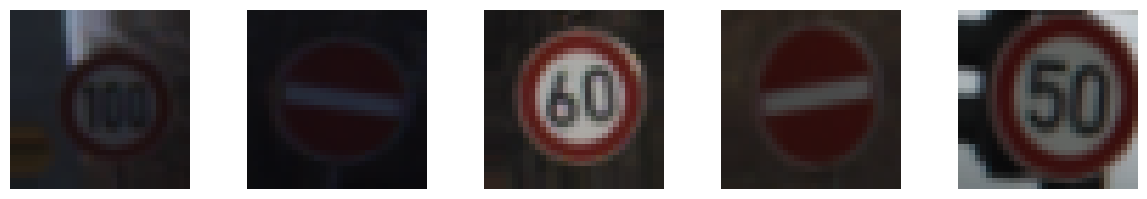

In [ ]:
batches_rgb = datagen_rgb.flow(X_train_rgb, y_train, batch_size = 5) 
X_batch_rgb, y_batch_rgb = next(batches_rgb)
     
fig, axs = plt.subplots(1, 5, figsize=(12, 12))
fig.tight_layout()
     
for i in range(5):
  axs[i].imshow(X_batch_rgb[i].reshape((32, 32,3)),cmap='gray')
  axs[i].axis("off")
     
print(X_batch_rgb.shape)

# **one** **hot** **encoding** **of** **labels**

In [ ]:
 y_train_cat = to_categorical(y_train, 43)
y_test_cat = to_categorical(y_test, 43)
y_val_cat = to_categorical(y_val, 43)

# VGG Model for the traffic signs

In [ ]:
vgg=VGG16(input_shape=(32,32,3),weights='imagenet',include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable= True
x=Flatten()(vgg.output)
Last_layer=Dense(43,activation='softmax')(x)
vgg_model=Model(inputs=vgg.input,outputs=Last_layer)
vgg_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
vgg_model.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg_history = vgg_model.fit_generator(datagen_rgb.flow(X_train_rgb, y_train_cat, batch_size=20),epochs=20,validation_data=(X_val_rgb, y_val_cat), shuffle = 1)

Epoch 1/20


<ipython-input-86-7d97123d78bf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg_history = vgg_model.fit_generator(datagen_rgb.flow(X_train_rgb, y_train_cat, batch_size=20),epochs=20,validation_data=(X_val_rgb, y_val_cat), shuffle = 1)


1740/1740 [==============================] - 46s 26ms/step - loss: 2.9930 - accuracy: 0.1615 - val_loss: 1.5643 - val_accuracy: 0.4565
Epoch 2/20
1740/1740 [==============================] - 47s 27ms/step - loss: 0.9705 - accuracy: 0.6674 - val_loss: 0.5838 - val_accuracy: 0.7916
Epoch 3/20
1740/1740 [==============================] - 46s 26ms/step - loss: 0.4859 - accuracy: 0.8424 - val_loss: 0.4341 - val_accuracy: 0.8757
Epoch 4/20
1740/1740 [==============================] - 45s 26ms/step - loss: 0.3493 - accuracy: 0.9016 - val_loss: 0.3273 - val_accuracy: 0.9091
Epoch 5/20
1740/1740 [==============================] - 46s 26ms/step - loss: 0.2597 - accuracy: 0.9297 - val_loss: 0.4118 - val_accuracy: 0.8794
Epoch 6/20
1740/1740 [==============================] - 45s 26ms/step - loss: 0.3207 - accuracy: 0.9193 - val_loss: 0.3444 - val_accuracy: 0.9320
Epoch 7/20
1740/1740 [==============================] - 45s 26ms/step - loss: 0.2359 - accuracy: 0.9415 - val_loss: 0.2113 - val_accura

In [ ]:
score = vgg_model.evaluate(X_test_rgb, y_test_cat, verbose=0)
print(score)

[0.39316385984420776, 0.9536025524139404]


# Resnet50  Implimentation for traffic sign classification

In [ ]:
resnet=ResNet50(input_shape=(32,32,3),weights='imagenet',include_top=False)

In [ ]:
for layer in resnet.layers:
  layer.trainable= True
x=Flatten()(resnet.output)
final_layer=Dense(43,activation='softmax')(x)
#prediction=Dense(1)(x)
resnet_model=Model(inputs=resnet.input,outputs=final_layer)
resnet_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
resnet_model.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
resnet_history = resnet_model.fit_generator(datagen_rgb.flow(X_train_rgb, y_train_cat, batch_size=20),epochs=20,validation_data=(X_val_rgb, y_val_cat), shuffle = 1)

Epoch 1/20


<ipython-input-91-48dfd8d0d9fa>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resnet_history = resnet_model.fit_generator(datagen_rgb.flow(X_train_rgb, y_train_cat, batch_size=20),epochs=20,validation_data=(X_val_rgb, y_val_cat), shuffle = 1)


1740/1740 [==============================] - 74s 39ms/step - loss: 3.3286 - accuracy: 0.2125 - val_loss: 477.1798 - val_accuracy: 0.1029
Epoch 2/20
1740/1740 [==============================] - 68s 39ms/step - loss: 2.5209 - accuracy: 0.3849 - val_loss: 1.9018 - val_accuracy: 0.3946
Epoch 3/20
1740/1740 [==============================] - 67s 38ms/step - loss: 1.3241 - accuracy: 0.5768 - val_loss: 1.0245 - val_accuracy: 0.6737
Epoch 4/20
1740/1740 [==============================] - 68s 39ms/step - loss: 0.7453 - accuracy: 0.7540 - val_loss: 0.6389 - val_accuracy: 0.7916
Epoch 5/20
1740/1740 [==============================] - 67s 38ms/step - loss: 0.4995 - accuracy: 0.8415 - val_loss: 0.6373 - val_accuracy: 0.8163
Epoch 6/20
1740/1740 [==============================] - 68s 39ms/step - loss: 0.3625 - accuracy: 0.8848 - val_loss: 0.5975 - val_accuracy: 0.8315
Epoch 7/20
1740/1740 [==============================] - 67s 38ms/step - loss: 0.2692 - accuracy: 0.9172 - val_loss: 0.6021 - val_accu

In [ ]:
score = resnet_model.evaluate(X_test_rgb, y_test_cat, verbose=0)
print(score)

[0.2625786066055298, 0.9377672076225281]


# **Inception** **Model**

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, Flatten
from keras.models import Model

inception = InceptionV3(input_shape=(75, 75, 3), weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = True
x = Flatten()(inception.output)
final_layer = Dense(43, activation='softmax')(x)
inception_model=Model(inputs=inception.input,outputs=final_layer)
inception_model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_97 (Conv2D)             (None, 37, 37, 32)   864         ['input_7[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 37, 37, 32)  96          ['conv2d_97[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_94 (Activation)     (None, 37, 37, 32)   0           ['batch_normalization_94[0]

In [ ]:
#resnet=ResNet50
#inception_model.summary()


MOBILENET

In [ ]:
from keras.applications.mobilenet import MobileNet

mobilenet = MobileNet(input_shape=(32, 32, 3), weights='imagenet', include_top=False)
for layer in mobilenet.layers:
    layer.trainable = True
x = Flatten()(mobilenet.output)
final_layer = Dense(43, activation='softmax')(x)


# Modified AlexNet

In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def modified_alexnet():
  model = Sequential()
  model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  
  model.add(Flatten())
  model.add(Dense(600, activation='relu'))
  #model.add(BatchNormalization())
  model.add(Dense(400, activation='relu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model



In [ ]:



def modified_alexnet():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(43, activation='softmax'))
    return model

modified_alex = modified_alexnet()
print(modified_alex.summary())



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_191 (Conv2D)         (None, 28, 28, 32)        832       
                                                                 
 conv2d_192 (Conv2D)         (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_193 (Conv2D)         (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 3200)             

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for data augmentation
datagen_gray = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Fit the generator to the training data
datagen_gray.fit(X_train_gray)


In [ ]:
modified_alex.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

m_alex_history = modified_alex.fit_generator(datagen_gray.flow(X_train_gray, y_train_cat, batch_size=40),epochs=20,validation_data=(X_val_gray, y_val_cat), shuffle = 1)

Epoch 1/20


<ipython-input-100-de40d11d20b3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  m_alex_history = modified_alex.fit_generator(datagen_gray.flow(X_train_gray, y_train_cat, batch_size=40),epochs=20,validation_data=(X_val_gray, y_val_cat), shuffle = 1)


870/870 [==============================] - 17s 19ms/step - loss: 3.4933 - accuracy: 0.0568 - val_loss: 4.0307 - val_accuracy: 0.0644
Epoch 2/20
870/870 [==============================] - 17s 19ms/step - loss: 3.4843 - accuracy: 0.0555 - val_loss: 4.1511 - val_accuracy: 0.0544
Epoch 3/20
870/870 [==============================] - 16s 19ms/step - loss: 3.4835 - accuracy: 0.0556 - val_loss: 4.2349 - val_accuracy: 0.0488
Epoch 4/20
870/870 [==============================] - 17s 20ms/step - loss: 3.4827 - accuracy: 0.0546 - val_loss: 3.9775 - val_accuracy: 0.0544
Epoch 5/20
870/870 [==============================] - 17s 19ms/step - loss: 3.4810 - accuracy: 0.0552 - val_loss: 4.0254 - val_accuracy: 0.0544
Epoch 6/20
870/870 [==============================] - 16s 19ms/step - loss: 3.4810 - accuracy: 0.0555 - val_loss: 3.7662 - val_accuracy: 0.0544
Epoch 7/20
870/870 [==============================] - 17s 19ms/step - loss: 3.4801 - accuracy: 0.0569 - val_loss: 3.7505 - val_accuracy: 0.0544
Epo

In [ ]:
score = modified_alex.evaluate(X_test_gray, y_test_cat, verbose=0)
print(score)

[3.775017261505127, 0.059382423758506775]


# **plots** **section** 

Text(0.5, 0, 'epoch')

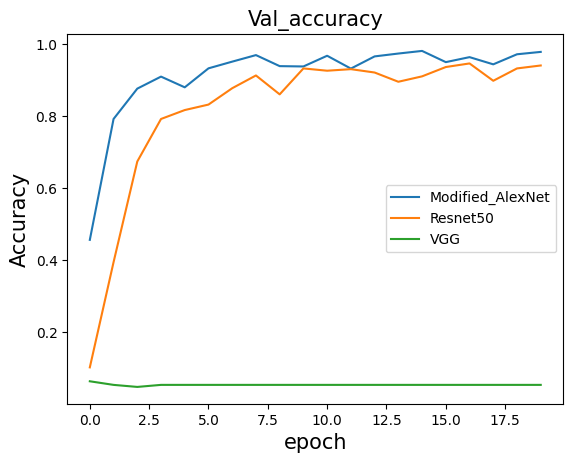

In [ ]:
plt.plot(vgg_history.history['val_accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.plot(m_alex_history.history['val_accuracy'])
plt.legend(['Modified_AlexNet','Resnet50','VGG'])
plt.title('Val_accuracy',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('epoch',fontsize=15)

Text(0, 0.5, 'Accuracy')

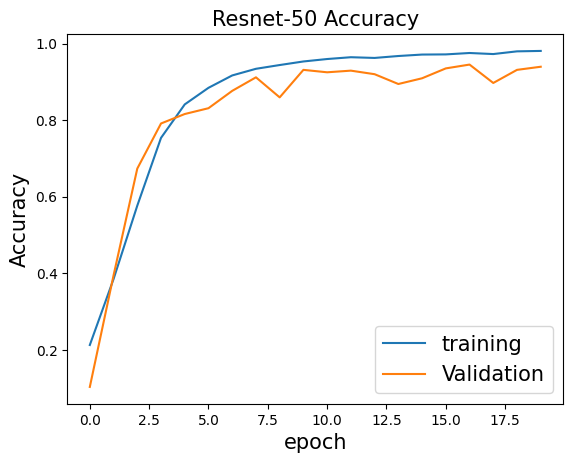

In [ ]:
# Resnet plots
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.legend(['training','Validation'],fontsize=15)
plt.title('Resnet-50 Accuracy',fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)

Text(0, 0.5, 'Loss')

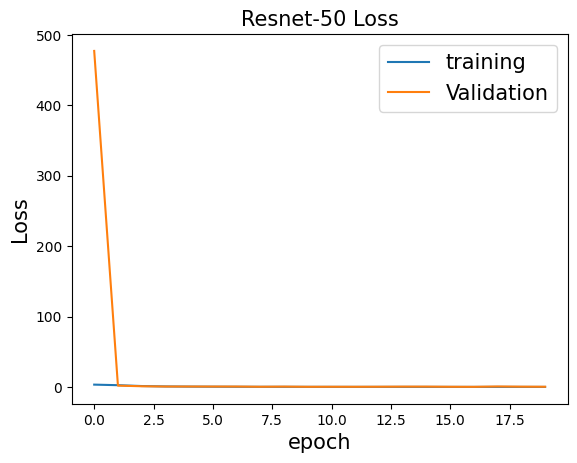

In [ ]:
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.legend(['training','Validation'],fontsize=15)
plt.title('Resnet-50 Loss',fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
 

Text(0, 0.5, 'Accuracy')

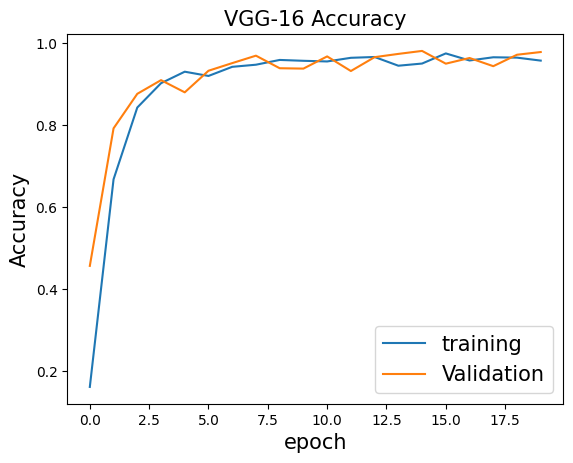

In [ ]:
# VGG plots
plt.plot(vgg_history.history['accuracy'])
plt.plot(vgg_history.history['val_accuracy'])
plt.legend(['training','Validation'],fontsize=15)
plt.title('VGG-16 Accuracy',fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)

Text(0, 0.5, 'Loss')

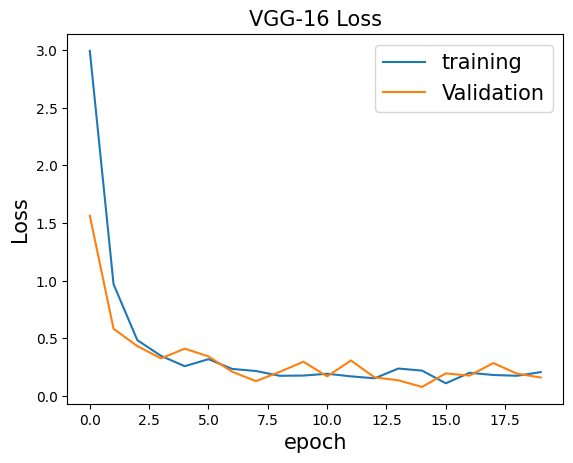

In [ ]:
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.legend(['training','Validation'],fontsize=15)
plt.title('VGG-16 Loss',fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)

Text(0, 0.5, 'Accuracy')

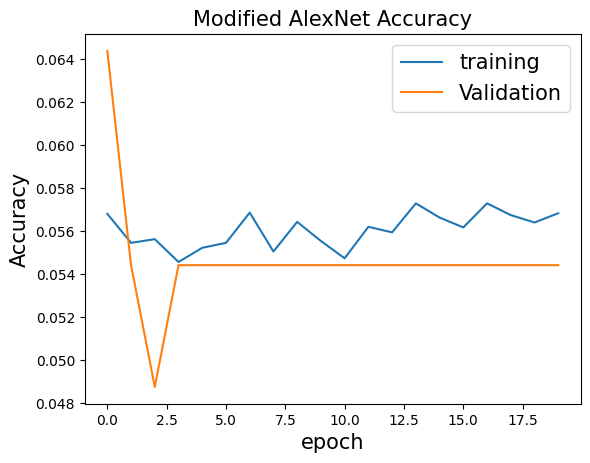

In [ ]:
#Modified Alexnet
plt.plot(m_alex_history.history['accuracy'])
plt.plot(m_alex_history.history['val_accuracy'])
plt.legend(['training','Validation'],fontsize=15)
plt.title('Modified AlexNet Accuracy',fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)

Text(0, 0.5, 'Loss')

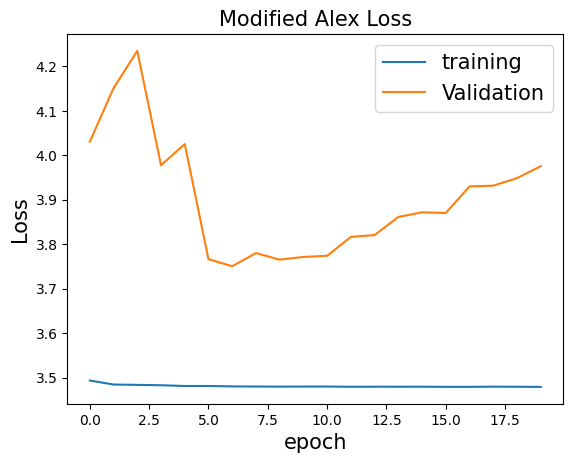

In [ ]:
plt.plot(m_alex_history.history['loss'])
plt.plot(m_alex_history.history['val_loss'])
plt.legend(['training','Validation'],fontsize=15)
plt.title('Modified Alex Loss',fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
